# Question 2

In [5]:
!pip install graphviz
import graphviz
import numpy as np

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [6]:
def viznn(input,weights_input_hidden,weights_hidden_output):
    # calculate the values of the neurons in the hidden layer & ouputlayer 
    hidden_values = np.dot(input, weights_input_hidden)
    output_values = np.dot(hidden_values, weights_hidden_output)

    # create a new graph object
    g = graphviz.Digraph(format='png')#, size="10,8",nodesep ="1.5")
    g.attr(splines='line')  # set the edges to use straight lines
    g.attr(rankdir='BT') # change the layout to rankdir='BT' for bottom-to-top orientation

    # add nodes
    g.node('x1', label=f'{input[0]}')
    g.node('x2', label=f'{input[1]}')
    g.node('h1', label=f'{hidden_values[0]:.2f}')
    g.node('h2', label=f'{hidden_values[1]:.2f}')
    g.node('h3', label=f'{hidden_values[2]:.2f}')
    g.node('y1', label=f'{output_values[0]:.2f}')
    g.node('y2', label=f'{output_values[1]:.2f}')

    # connect nodes from input to hidden layer with weights
    for i, input in enumerate(['x1', 'x2']):
        for j, h in enumerate(['h1', 'h2', 'h3']):
            weight = weights_input_hidden[i, j]
            g.edge(input, h, label=f'{weight:.1f}')

    # connect nodes from hidden to output layer with weights
    for i, h in enumerate(['h1', 'h2', 'h3']):
        for j, y in enumerate(['y1', 'y2']):
            weight = weights_hidden_output[i, j]
            g.edge(h, y, label=f'{weight:.1f}')

    return g


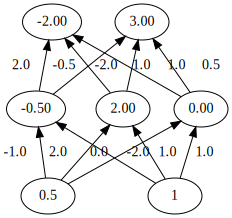

In [7]:
# define the weights
weights_input_hidden = np.array([[-1.0, 2.0, -2.0], [0.0, 1.0, 1.0]])
weights_hidden_output = np.array([[2.0, -2.0], [-0.5, 1.0], [1.0, 0.5]])

viznn([0.5, 1],weights_input_hidden,weights_hidden_output)

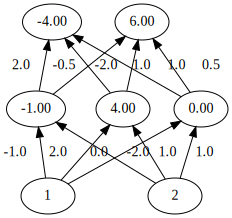

In [8]:
viznn([1, 2],weights_input_hidden,weights_hidden_output)

# Question 3